# Financial Tweets Analysis NLP

This notebooks performs exploratory data analysis, topic modelling and sentiment analysis using the text from financial tweet data https://www.kaggle.com/davidwallach/financial-tweets

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.util import ngrams

from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imoge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv("C:/Users/imoge/Projects/Datasets/stockerbot-export.csv", index_col = 0, sep=',')

In [5]:
df.head(52)

text  \
id                                                               
1.0197E+18   VIDEO: ‚ÄúI was in my office. I was minding my o...   
1.01971E+18  The price of lumber $LB_F is down 22% since hi...   
1.01971E+18  Who says the American Dream is dead? https://t...   
1.01972E+18  Barry Silbert is extremely optimistic on bitco...   
1.01972E+18  How satellites avoid attacks and space junk wh...   
1.01972E+18  .@RealMoney's David Butler's favorite FANG sto...   
1.01972E+18  Don‚Äôt miss my convo with one of my favorite th...   
1.01972E+18  U.S. intelligence documents on Nelson Mandela ...   
1.01972E+18  Senate wants emergency alerts to go out throug...   
1.01972E+18  Hedge fund manager Marc Larsy says bitcoin $40...   
1.01972E+18  U.S. proposes expedited appeal in fight with A...   
1.01972E+18  Roger Federer's Uniqlo deal makes him one of t...   
1.01972E+18  Bond traders are ahead of Jerome Powell when i...   
1.01972E+18  Alcoa cuts adjusted EBITDA forecast citing tar...   
1.01973E+18  Customers urge boycott of MGM Resorts after th...   
1.01973E+18  The gap tightens in the race to a trillion dol...   
1.01973E+18  President Trump endorses Brian Kemp over Casey...   
1.01973E+18  White House struggles to contain fallout from ...   
1.01973E+18  Lakers guard Hart named summer league MVP and ...   
1.01973E+18  Only two northern white rhinos still exist mak...   
1.01973E+18  Trump tells CBS he's "always wanted" to be int...   
1.01974E+18  Templeton and BlackRock say now's the time to ...   
1.01974E+18  Charts say #RealMoneySOD $GOOGL could rise 17%...   
1.01974E+18  EBay revenue misses as weak U.S. sporting seas...   
1.01974E+18  New York City will force Airbnb to disclose in...   
1.01974E+18  RT @josheidelson: Exclusive: Elon Musk called ...   
9.67109E+17  New time: Janet Yellen and I in conversation a...   
1.01608E+18  The robot homie R2-D2 told me to buy sell and ...   
1.01609E+18  Arthur J Gallagher &amp; Co $AJG vs. Marsh &am...   
1.01609E+18  Arthur J Gallagher &amp; Co $AJG vs. Marsh &am...   
1.01609E+18  $INFO $C Asia Stocks Signal Gains; Dollar Weak...   
1.01609E+18  RT @dailypoliticaln: Fluor Co. $NEW $FLR Stock...   
1.01609E+18  Avery Dennison Corporation $AVY EPS Estimated ...   
1.01609E+18  What's shaking guys? Inflation &amp; bank earn...   
1.01609E+18  EPS for Avery Dennison Corporation $AVY Expect...   
1.01609E+18  Avery Dennison Corporation $AVY EPS Estimated ...   
1.01609E+18  RT @oliviabvoz: What's shaking guys? Inflation...   
1.0161E+18   Do you know that #Book Value for $XYL is $13.9...   
1.0161E+18   Do you know that #WallStreet price for $IRM is...   
1.0161E+18   Wondering about risks of $IRM? The 21-day vola...   
1.0161E+18   $ORLY Max Pain=280.00. Maturity=07/20/2018. #m...   
1.0161E+18   $AVB Max Pain=170.00. Maturity=07/20/2018. #ma...   
1.0161E+18   $CUBE $EXR $HOG $KO $LSI $PSA $IRM https://t.c...   
1.01611E+18  MTTS WEEKLY WATCHLIST FOR JULY 9TH 2018 $CXO $...   
1.01611E+18  Analysts Expect Mosaic Co $MOS Will Announce E...   
1.01611E+18  $2.29 Billion in Sales Expected for Mosaic Co ...   
1.01611E+18  In 2 days I doubled my account with the option...   
1.01611E+18  $NI high OI range is 26.00 to 26.00 for option...   
1.01611E+18  RT @TradeSatoshi: $AMG AMGCHAIN  will be delis...   
1.01611E+18  Payments halted under Obamacare program https:...   
1.01612E+18  RT @forever_t_2000: Theres goes $SODE breaking...   
1.01612E+18  $JEC Max Pain=65.00. Maturity=07/20/2018. #max...   

                                  timestamp           source        symbols  \
id                                                                            
1.0197E+18   Wed Jul 18 21:33:26 +0000 2018     GoldmanSachs             GS   
1.01971E+18  Wed Jul 18 22:22:47 +0000 2018       StockTwits              M   
1.01971E+18  Wed Jul 18 22:32:01 +0000 2018        TheStreet            AIG   
1.01972E+18  Wed Jul 18 22:52:52 +0000 2018      MarketWatch            BTC   
1.01972E+18  We

In [6]:
df.shape

(28440, 16)

In [7]:
df = df[['text','timestamp','source','symbols','company_names']]
df.reset_index(drop = True, inplace = True)

In [8]:
# Check for null values
df.isnull().sum()

text             0
timestamp        2
source           3
symbols          3
company_names    5
dtype: int64

In [9]:
# Drop rows with nulls
df = df.dropna()

In [10]:
df.shape

(28435, 5)

In [11]:
df.sample(5)

text  \
3192   üìä The 10 Best Performing S&amp;P 500 Stocks YT...   
13733  Exploring different #socialmedia built on the ...   
4539   Investors Buy Large Volume of Nuance Communica...   
27902  @AAF @djheakin You better read the rest of the...   
20971  Barclays Reconfirmed Darden Restaurants $DRI A...   

                            timestamp           source symbols  \
3192   Thu Jul 12 13:05:11 +0000 2018          esimong      XL   
13733  Tue Jul 17 12:19:16 +0000 2018  cryptoctopus777     SPN   
4539   Fri Jul 13 07:07:40 +0000 2018    OlympiaReport    NUAN   
27902  Wed Jul 18 23:07:41 +0000 2018          RobTVDC     WFC   
20971  Wed Jul 18 13:36:57 +0000 2018      Fanob_stock     DRI   

                  company_names  
3192               XL Group Ltd  
13733  Superior Energy Services  
4539      Nuance Communications  
27902     Wells Fargo & Company  
20971        Darden Restaurants

In [12]:
print(df["text"].iloc[3])

Barry Silbert is extremely optimistic on bitcoin -- but predicts that 99% of new crypto entrants are ‚Äúgoing to zero‚Ä¶ https://t.co/mGMVo2cZgY


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28435 entries, 0 to 28439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           28435 non-null  object
 1   timestamp      28435 non-null  object
 2   source         28435 non-null  object
 3   symbols        28435 non-null  object
 4   company_names  28435 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


In [14]:
# Split out the date information
df[['Day_week','Month','Day','Time','Timezone', 'Year']] = df.timestamp.str.split(expand=True)
df[['Hour','Minute','Second']] = df.Time.str.split(':',expand=True)
df.drop(columns = ["timestamp"],axis = 1, inplace = True)
df.head(2)

text        source symbols  \
0  VIDEO: ‚ÄúI was in my office. I was minding my o...  GoldmanSachs      GS   
1  The price of lumber $LB_F is down 22% since hi...    StockTwits       M   

       company_names Day_week Month Day      Time Timezone  Year Hour Minute  \
0  The Goldman Sachs      Wed   Jul  18  21:33:26    +0000  2018   21     33   
1             Macy's      Wed   Jul  18  22:22:47    +0000  2018   22     22   

  Second  
0     26  
1     47

# Exploratory Data Analysis

## Number of Tweets by Company Names

In [15]:
companies = df["company_names"].value_counts()
companies_top = pd.DataFrame(companies.head(15)).reset_index()
companies_top.columns = ["Company","Number of Tweets"]
companies_top

Company  Number of Tweets
0       Twenty-First Century Fox               132
1                  Alphabet Inc.               116
2                      Discovery               104
3                        Netflix               101
4              Applied Materials               100
5   Honeywell International Inc.               100
6                      Momo Inc.               100
7                        The Gap               100
8           M&T Bank Corporation               100
9              Eversource Energy               100
10                       Groupon                99
11          Essex Property Trust                99
12             Mohawk Industries                99
13             Masco Corporation                99
14            Ingersoll-Rand Plc                98

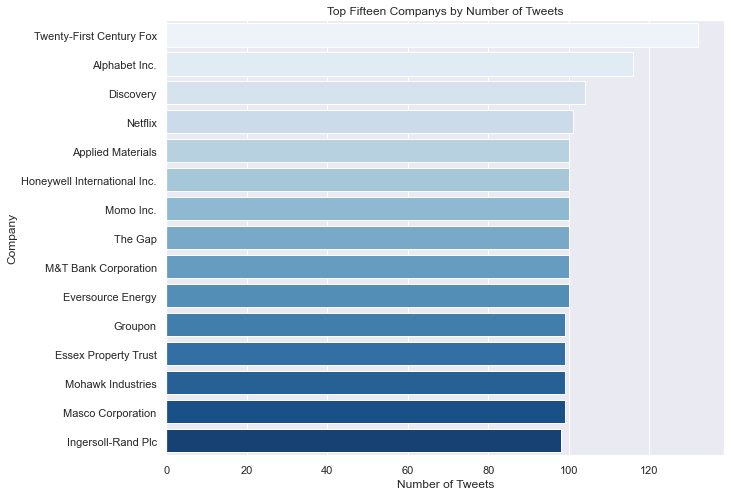

In [16]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(data = companies_top, y = "Company", x = "Number of Tweets", palette = "Blues")
plt.title("Top Fifteen Companys by Number of Tweets");

In [17]:
companies_bot = pd.DataFrame(companies.tail(15)).reset_index()
companies_bot.columns = ["Company","Number of Tweets"]
companies_bot

Company  Number of Tweets
0                     Alphabet                 1
1               Amazon*The Gap                 1
2   Facebook*Alphabet*Alphabet                 1
3                           JD                 1
4                   Intel*U.S.                 1
5                      Twitter                 1
6                  Time Warner                 1
7                  MGM Resorts                 1
8                     American                 1
9                       Harris                 1
10           The Goldman Sachs                 1
11                      Oracle                 1
12                    Northern                 1
13                        eBay                 1
14                         CBS                 1

## Number of Tweets by Source

In [18]:
source = df["source"].value_counts()
source = pd.DataFrame(source.head(15)).reset_index()
source.columns = ["Source","Number of Tweets"]
source

Source  Number of Tweets
0   bibeypost_stock               990
1   whatsonthorold2               963
2      mmahotstuff1               899
3     reurope_stock               668
4   MareaInformativ               640
5      optioncharts               614
6      ConsumerFeed               411
7   dispatchtribune               381
8   EnterpriseLeade               368
9     OlympiaReport               367
10  TranscriptDaily               367
11      ledgerzette               365
12       ZolmaxNews               347
13  TheMarketsDaily               341
14   ThisLincolnian               334

In [19]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(data = source, y = "Source", x = "Number of Tweets", palette = "Blues")
plt.title("Top Fifteen Sources by Number of Tweets");

## Number of Tweets by Time Period

In [20]:
df.columns

Index(['text', 'source', 'symbols', 'company_names', 'Day_week', 'Month',
       'Day', 'Time', 'Timezone', 'Year', 'Hour', 'Minute', 'Second'],
      dtype='object')

In [21]:
df["Year"].value_counts()

2018    28435
Name: Year, dtype: int64

In [22]:
df["Month"].value_counts()

Jul    28434
Feb        1
Name: Month, dtype: int64

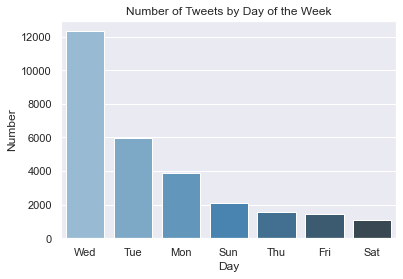

In [23]:
day = pd.DataFrame(df["Day_week"].value_counts()).reset_index()
day.columns = ["Day","Number"]
sns.barplot(data = day, x = "Day", y = "Number",palette = "Blues_d")
plt.title("Number of Tweets by Day of the Week");

In [24]:
hour = pd.DataFrame(df["Hour"].value_counts()).reset_index()
hour.columns = ["Hour","Number"]
sns.barplot(data = hour, x = "Hour", y = "Number",palette = "Blues_d")
plt.title("Number of Tweets by Hour of the Day");

Most tweets are made in the afternoon and evening and the least in the early hours of the morning

In [25]:
# Average number of tweets per hour
hour["Number"].sum()/24

1184.7916666666667

## Explore Text

In [26]:
# Check the length of the tweets
df["len_text"] = df["text"].apply(lambda x: len(x))

In [27]:
# Look at the average, max and min characters
df["len_text"].describe()

count    28435.000000
mean       110.627642
std        182.633723
min          2.000000
25%         87.000000
50%        114.000000
75%        137.000000
max      24561.000000
Name: len_text, dtype: float64

In [28]:
# Find tweets over 200 characters
df[df["len_text"] >200]

text       source symbols  \
3127   Novice Traders trade 5 to 10 times too big. Th...     WaltBTIG     MSI   
4221   The report is excellent in terms of record pro...     NWRcomms     PRU   
8045   has lifted the United States above Saudi Arabi...  lasertrader     CBS   
26369  Rhodes posted her petition [about alleged sexu...    Union_Los   CMCSA   

              company_names Day_week Month Day      Time Timezone  Year Hour  \
3127     Motorola Solutions      Thu   Jul  12  12:34:09    +0000  2018   12   
4221   Prudential Financial      Fri   Jul  13  00:18:39    +0000  2018   00   
8045        CBS Corporation      Sun   Jul  15  15:19:53    +0000  2018   15   
26369   Comcast Corporation      Wed   Jul  18  21:05:28    +0000  2018   21   

      Minute Second  len_text  
3127      34     09     24561  
4221      18     39      3948  
8045      19     53     17651  
26369     05     28      1760

In [69]:
# Longest characters looks like multiple tweets not split correctly
#print(df["text"].iloc[3127])

In [30]:
df2 = df[["text"]]

In [31]:
df2.head()

text
0  VIDEO: ‚ÄúI was in my office. I was minding my o...
1  The price of lumber $LB_F is down 22% since hi...
2  Who says the American Dream is dead? https://t...
3  Barry Silbert is extremely optimistic on bitco...
4  How satellites avoid attacks and space junk wh...

## Clean Text

In [32]:
# Set text to lower case
df2["text"] = df2["text"].apply(lambda x: x.lower())

In [33]:
# Remove stopwords, twitter links - credit to BENOIT CANTE (Kaggle)
stop = stopwords.words('english')
stop.append("rt") # RT for retweet
url_regex = "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"  # URL
handle_regex= "^@?(\w){1,15}$"  # Twitter handle

df2['text']=df2['text'].str.replace(url_regex, '')
df2['text']=df2['text'].str.replace(handle_regex, '')

df2['text']=df2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [34]:
df2.head()

text
0  video: ‚Äúi office. minding business...‚Äù ‚Äìdavid ...
1  price lumber $lb_f 22% since hitting ytd highs...
2                          says american dream dead?
3  barry silbert extremely optimistic bitcoin -- ...
4  satellites avoid attacks space junk circling e...

In [35]:
# Tokenize the text
df2["text"] = df2["text"].apply(lambda x: nltk.word_tokenize(x))

In [36]:
# Remove punctuation
punc = string.punctuation
df2["text"] = df2["text"].apply(lambda x: [word for word in x if word not in punc])

In [37]:
# Remove non ascii characters
df2["text"] = df2["text"].apply(lambda x: [e for e in x if e.encode("ascii","ignore")])

In [38]:
# Remove numbers
df2["text"] = df2["text"].apply(lambda x: [n for n in x if not n.isnumeric()])

In [39]:
df2.head()

text
0  [video, i, office, minding, business, ..., ‚Äìda...
1  [price, lumber, lb_f, since, hitting, ytd, hig...
2                      [says, american, dream, dead]
3  [barry, silbert, extremely, optimistic, bitcoi...
4  [satellites, avoid, attacks, space, junk, circ...

## Most Frequent Words

In [40]:
# Find the most frequent words and visualise these words
df2["count"] = df2["text"].apply(lambda x: Counter(x))

In [41]:
df2.head(2)

text  \
0  [video, i, office, minding, business, ..., ‚Äìda...   
1  [price, lumber, lb_f, since, hitting, ytd, hig...   

                                               count  
0  {'video': 1, 'i': 1, 'office': 1, 'minding': 1...  
1  {'price': 1, 'lumber': 1, 'lb_f': 1, 'since': ...

In [42]:
print(df2["count"].iloc[0])

Counter({'video': 1, 'i': 1, 'office': 1, 'minding': 1, 'business': 1, '...': 1, '‚Äìdavid': 1, 'solomon': 1, 'tells': 1, 'gs': 1, 'interns': 1, 'learned': 1, 'wa‚Ä¶': 1})


In [43]:
counter_df = pd.DataFrame(df2["count"].sum().most_common(100),columns = ["Word","Count"])
counter_df.head()

Word  Count
0       amp   3004
1       inc   2007
2      inc.   1936
3  earnings   1838
4     stock   1796

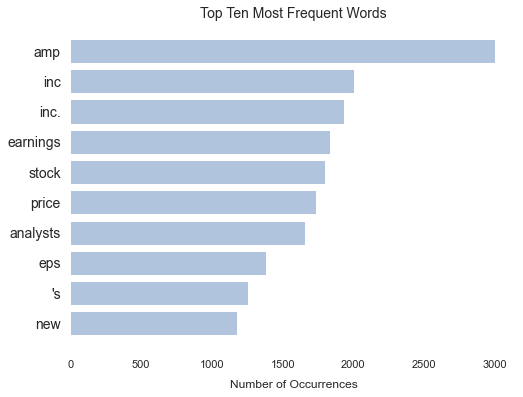

In [44]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_facecolor("White")
counter_top = counter_df.sort_values(by = "Count",ascending = False).head(10)
ax.barh(counter_top["Word"], width = counter_top["Count"], color = "lightsteelblue")
ax.set_title("Top Ten Most Frequent Words",fontsize = 14)
ax.invert_yaxis()
ax.set_xlabel("Number of Occurrences",labelpad = 10)
plt.yticks(fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [45]:
stopwords = list(STOPWORDS)
words = " ".join(x for x in counter_df.Word)
wc = WordCloud(stopwords=stopwords, background_color="white").generate(words)

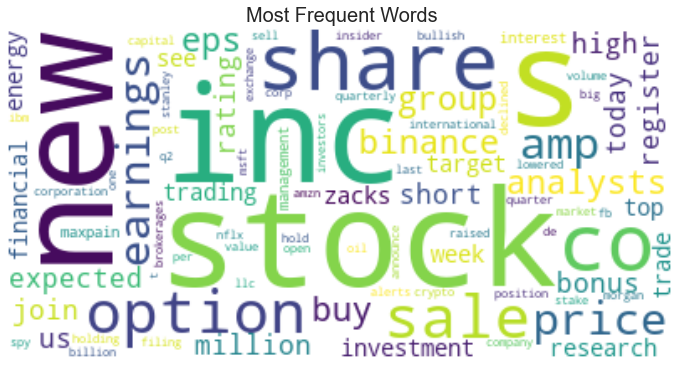

In [46]:
# Display the generated image: Hotels positive words
plt.figure(figsize=[12,10])
plt.title("Most Frequent Words", fontsize = 20)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Most Frequent Bigrams

In [54]:
df2["bigrams"] = df2["text"].apply(lambda x: ngrams(x,2))
df2["bigrams_count"] = df2["bigrams"].apply(Counter)

In [65]:
bigrams = pd.DataFrame(df2["bigrams_count"].sum().most_common(),columns = ["Bigram","Count"])
bigrams["Bigram"] = bigrams["Bigram"].apply(lambda x: ' '.join(x))

In [66]:
bigrams.head()

Bigram  Count
0   register bonus    957
1          join us    691
2        per share    551
3  maxpain options    530
4     price target    513

In [67]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_facecolor("White")
bigrams_top = bigrams.sort_values(by = "Count",ascending = False).head(10)
ax.barh(bigrams_top["Bigram"], width = bigrams_top["Count"], color = "lightsteelblue")
ax.set_title("Top Ten Most Frequent Bigrams",fontsize = 14)
ax.invert_yaxis()
ax.set_xlabel("Number of Occurrences",labelpad = 10)
plt.yticks(fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

## Find the Main Topics Based on Topic Modelling

In [75]:
# Create word string before vectorizing
bigrams_joined = bigrams["Bigram"]
bigrams_joined = bigrams_joined.apply(lambda x:''.join(x))

In [82]:
# Create vectorized text
tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_vector = tf_idf_vectorizer.fit_transform(bigrams_joined)

In [111]:
# Set up LDA model (try ten topics as per default - NOTE different numbers can be tried and the perplexity or log likelihood
# scores compared)

topics = 10
method = "online"

lda_model = LatentDirichletAllocation(n_components = topics, 
                                      random_state = 42, 
                                      learning_method = method)
dtm = lda_model.fit_transform(tfidf_vector)

In [120]:
# Create document topic matrix and add likely topics based on the highest tfidf weightings
df_dtm = pd.DataFrame(dtm)
df_dtm["Topic"] = df_dtm.idxmax(axis = 1)
df_dtm.head()

0         1         2         3         4         5         6  \
0  0.036786  0.036786  0.491337  0.214374  0.036786  0.036786  0.036786   
1  0.203916  0.037135  0.499006  0.037135  0.037135  0.037135  0.037135   
2  0.037201  0.037201  0.037201  0.495435  0.037201  0.037201  0.037201   
3  0.037030  0.037030  0.037030  0.037030  0.037030  0.211674  0.037030   
4  0.037654  0.037654  0.037654  0.037654  0.661111  0.037654  0.037654   

          7         8         9  Topic  
0  0.036786  0.036786  0.036786      2  
1  0.037135  0.037135  0.037135      2  
2  0.037201  0.037201  0.206957      3  
3  0.037030  0.037030  0.492085      9  
4  0.037654  0.037654  0.037654      4

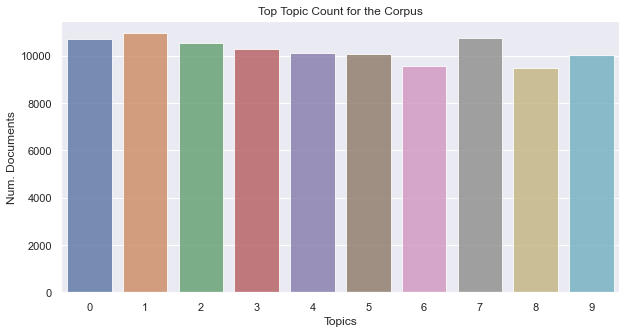

In [121]:
# Obtain value counts per topic and plot
x = pd.DataFrame(df_dtm["Topic"].value_counts())
x.T
plt.figure(figsize=(10,5))
sns.barplot(x.index, x.Topic, alpha=0.8)
plt.title("Top Topic Count for the Corpus")
plt.ylabel("Num. Documents")
ax = plt.xlabel("Topics")

With the ten topics used in the model, they are all very similar in terms of the numbers of documents allocated to each topic.It may be that more topics would be better.

In [129]:
# Get the Word Topic matrix and convert to probabilities
wtm = lda_model.components_
wtm/=wtm.sum(axis = 1)[:,np.newaxis]

ind = ["Topic1","Topic2","Topic3","Topic4","Topic5","Topic6","Topic7","Topic8","Topic9","Topic10"]
df_word_prob = pd.DataFrame(wtm, columns = [tf_idf_vectorizer.get_feature_names()], index = ind)
df_word_prob["Prob"] = df_word_prob.iloc[:,:].sum(axis=1)

In [131]:
# Sort top ten words by weight and then use to look up words
feature_names = np.array(tf_idf_vectorizer.get_feature_names())
all_words = np.array(feature_names)
topic_top = []
for topic_weights in wtm:
  top_word_ind = (-topic_weights).argsort()[:10]
  topic_top.append(all_words.take(top_word_ind))
    
# Create topic - keywords Dataframe
cols = ["Word1","Word2","Word3","Word4","Word5","Word6","Word7","Word8","Word9","Word10"]

topic_word_matrix = pd.DataFrame(topic_top,columns = cols ,index = ind)                                  
topic_word_matrix.T

Topic1     Topic2   Topic3    Topic4     Topic5   Topic6    Topic7  \
Word1         day        see       50  position         00      new       inc   
Word2     trading   interest       de   holding      price      one       eps   
Word3         max      could     amzn      week       high       10    stocks   
Word4        open     versus     time     stake    million     post  expected   
Word5        move        big     aapl        12     target     good        vs   
Word6          us      still     msft       csx       call   rating  analysts   
Word7         spy    capital   volume      next       ebay      get       btc   
Word8          gt         20       mu      year    quarter       co        25   
Word9   estimates  financial      amd     chart  increased      put     group   
Word10         it      first  billion        q2      sales  binance    expect   

          Topic8  Topic9  Topic10  
Word1   earnings     amp      buy  
Word2         ms   stock   shares  
Word3       corp   today     nflx  
Word4     raised  market    trade  
Word5    lowered      18    calls  
Word6         gs    long  bullish  
Word7        aug   short    share  
Word8         at    last      ibm  
Word9       csco      13       fb  
Word10        pt    like      low

Without domain knowledge it is difficult to determine distinct topics here. There may be many more topics than the ten selected and further work trying different numbers of topics would allow this to be analysed.

A final model can be used to predict the topic of any incoming new tweets

## Sentiment of the Tweets

In [133]:
# Set up an analyser object for Vader
sia = SentimentIntensityAnalyzer()

In [134]:
df2["text"] = df2["text"].apply(lambda x: ' '.join(x))

In [135]:
# Run VADER against each tweet
df2["VNeg"] = df2["text"].apply(lambda x: sia.polarity_scores(x)['neg'])
df2["VNeu"] = df2["text"].apply(lambda x: sia.polarity_scores(x)['neu'])
df2["VPos"] = df2["text"].apply(lambda x: sia.polarity_scores(x)['pos'])
df2["VComp"] = df2["text"].apply(lambda x: sia.polarity_scores(x)['compound'])

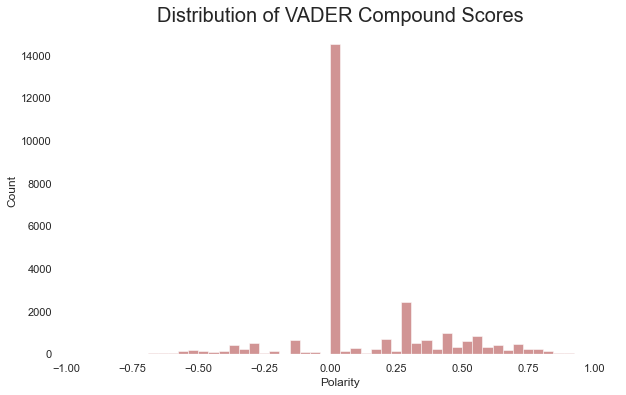

In [136]:
# Plot Vader Compound Scores
num_bins = 50
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor("White")
n, bins, patches = plt.hist(df2.VComp, num_bins, facecolor='brown', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Distribution of VADER Compound Scores', fontsize = 20)
plt.show();

In [137]:
# How many reviews have sentiment above and below 0.05 threshold suggested in the documentation
print(df2[df2["VComp"] >= 0.05].shape[0]) # positive
print(df2[(df2["VComp"] <0.05) & (df2["VComp"] > -0.05)].shape[0]) # neutral
print(df2[df2["VComp"] <= -0.05].shape[0]) # negative

10556
14578
3301


Most tweets appear to be neutral or positive, very few are negative

## Can we Build a Predictive Model for Tweet Sentiment?

Including neutral sentiment tweets is more difficult in terms of building a predictive model, as this would be a multi-class classification rather than binary. Also neutral sentiment is not as clearly defined as positive and negative sentiment documents as they tend to lie on the decision boundary of a model. However, VADER classified the vast majority of tweets as neutral sentiment and this might be expected with the subject which is very factual and less likely to contain emotion. Therefore we will try to build a classifier that does include neutral sentiment but expect this to not be very successful.

In [138]:
# Classify the tweets according to the VADER compound sentiment score
s = df2[["text","VComp"]]

conditions = [(s["VComp"]>0.05),s["VComp"]<=-0.05,(s["VComp"] <0.05) & (s["VComp"] > -0.05)]
choices = [1,-1,0]

s["Score"] = np.select(conditions,choices,default = 'null')
s["Score"] = s["Score"].astype('int64')

In [139]:
s.head()

text   VComp  Score
0  video i office minding business ... ‚Äìdavid sol...  0.0000      0
1  price lumber lb_f since hitting ytd highs macy...  0.0000      0
2                           says american dream dead -0.5106     -1
3  barry silbert extremely optimistic bitcoin -- ...  0.3804      1
4  satellites avoid attacks space junk circling e... -0.6249     -1

In [140]:
# Balance the dataset by taking equal numbers of each sentiment based on VADER's analysis
s.Score.value_counts()

 0    14578
 1    10556
-1     3301
Name: Score, dtype: int64

In [141]:
# Set dataframes
pos = s[s["Score"] == 1]
neg = s[s["Score"] == -1]
neut = s[s["Score"] == 0]

In [147]:
# Sample same amount from each and concat back to single dataframe and shuffle
pos = pos.sample(3300)
neg = neg.sample(3300)
neut = neut.sample(3300)

final = pd.concat([pos,neg,neut],axis = 0)
final = final.sample(frac=1)
final.Score.value_counts()

-1    3300
 1    3300
 0    3300
Name: Score, dtype: int64

In [152]:
final.head()

text   VComp  Score  \
10114  insider selling glu mobile inc. gluu vp sells ...  0.2960      1   
13224  sysco co. syy expected announce quarterly sale...  0.0000      0   
19280  idra bmy mrk orphan drug designation fast trac...  0.3182      1   
4936   premarket pixy beat earnings wwe morgan ups go... -0.1027     -1   
18119           valuengine lowers omnicom group omc sell -0.1280     -1   

                                             joined_text  
10114  insider selling glu mobile inc. gluu vp sells ...  
13224  sysco co. syy expected announce quarterly sale...  
19280  idra bmy mrk orphan drug designation fast trac...  
4936   premarket pixy beat earnings wwe morgan ups go...  
18119           valuengine lowers omnicom group omc sell

In [153]:
# Set X and y and split into training and test sets

X = final["text"]
y = final["Score"]

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [162]:
# Create word string before vectorizing
X_train = X_train.apply(lambda x:''.join(x))
X_test = X_test.apply(lambda x: ''.join(x))

In [163]:
# Create vectorized text
tf_idf_vectorizer = TfidfVectorizer()
vector_train = tf_idf_vectorizer.fit_transform(X_train)
vector_test = tf_idf_vectorizer.transform(X_test)

In [165]:
# Specify models
nb = MultinomialNB()
lr = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC(probability = True)

In [167]:
# Fit the models
nb.fit(vector_train, y_train)
lr.fit(vector_train, y_train)
rf.fit(vector_train, y_train)
svm.fit(vector_train, y_train)

SVC(probability=True)

In [170]:
# Predict against test set
y_prednb = nb.predict(vector_test)
y_predlr = lr.predict(vector_test)
y_predrf = rf.predict(vector_test)
y_predsvm = svm.predict(vector_test)

In [173]:
print(classification_report(y_test, y_prednb))

              precision    recall  f1-score   support

          -1       0.81      0.81      0.81       689
           0       0.80      0.77      0.78       626
           1       0.79      0.82      0.80       665

    accuracy                           0.80      1980
   macro avg       0.80      0.80      0.80      1980
weighted avg       0.80      0.80      0.80      1980



In [175]:
print(classification_report(y_test, y_predlr))

              precision    recall  f1-score   support

          -1       0.91      0.85      0.88       689
           0       0.81      0.89      0.85       626
           1       0.90      0.87      0.89       665

    accuracy                           0.87      1980
   macro avg       0.87      0.87      0.87      1980
weighted avg       0.87      0.87      0.87      1980



In [176]:
print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

          -1       0.95      0.86      0.90       689
           0       0.81      0.95      0.88       626
           1       0.95      0.89      0.91       665

    accuracy                           0.90      1980
   macro avg       0.90      0.90      0.90      1980
weighted avg       0.90      0.90      0.90      1980



In [177]:
print(classification_report(y_test, y_predsvm))

              precision    recall  f1-score   support

          -1       0.93      0.87      0.90       689
           0       0.80      0.91      0.85       626
           1       0.93      0.88      0.90       665

    accuracy                           0.88      1980
   macro avg       0.89      0.88      0.88      1980
weighted avg       0.89      0.88      0.88      1980



The random forest model seems to have the best overall accuracy

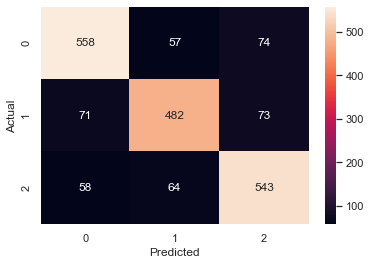

In [186]:
sns.heatmap(confusion_matrix(y_test, y_prednb), annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Actual");

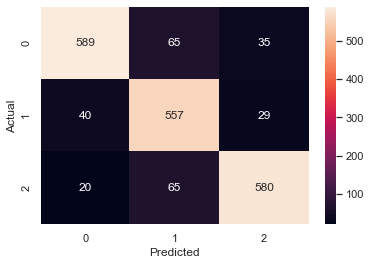

In [187]:
sns.heatmap(confusion_matrix(y_test, y_predlr), annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Actual");

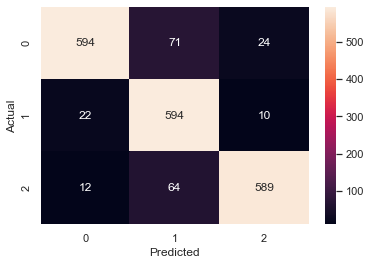

In [188]:
sns.heatmap(confusion_matrix(y_test, y_predrf), annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Actual");

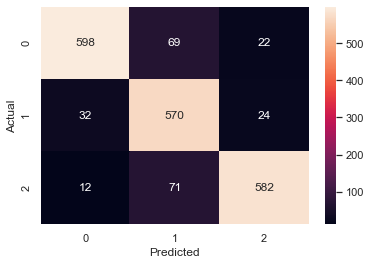

In [189]:
sns.heatmap(confusion_matrix(y_test, y_predsvm), annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Actual");

* The models returned reasonable accuracy. 
* Accuracy can be used for evaluation as the dataset is balanced. 
* The random forest returned the best accuracy at 90%. 
* The model predicts the neutral comments better than positive or negative and performs worst in terms of recall in predicting negative tweets.